In [1]:
import numpy
import survhive as tosa
import torch

In [2]:
#numpy.random.seed(2307)
# _ = torch.manual_seed(2307)

In [3]:
X,y = tosa.load_test_data()

In [4]:
X.shape, y.shape


((198, 84), (198,))

# test coxnet

In [5]:
coxnet = tosa.CoxNet()

In [6]:
coxnet.fit(X,y)

CoxNet(rng_seed=-1, l1_ratio=0.5, verbose=False, fit_baseline_model=False)

In [7]:
y_cox = coxnet.predict(X)
y_cox.shape, y_cox.dtype

((198,), dtype('float64'))

In [8]:
y[y.dtype.names[0]].dtype

dtype('bool')

## Test C-index

In [9]:
from sksurv.metrics import concordance_index_censored

In [10]:
concordance_index_censored(y[y.dtype.names[0]], y[y.dtype.names[1]],y_cox)

(0.9462189117535664, 7495, 426, 0, 0)

## test pycox

In [11]:
dhs = tosa.DeepHitSingle(learning_rate=0.05, epochs=100, batch_size=len(y)//2, rng_seed = 2307)

In [12]:
dhs.fit(X,y)

/usr/local/ivan/Unito/conda/envs/survhive-pycox/lib/python3.10/site-packages/torchtuples/callbacks.py:607: UserWarning: This overload of add is deprecated:
	add(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add(Tensor other, *, Number alpha) (Triggered internally at  /croot/pytorch_1675190298929/work/torch/csrc/utils/python_arg_parser.cpp:1174.)
  p.data = p.data.add(-weight_decay * eta, p.data)


DeepHitSingle(rng_seed=2307, num_durations=10, layer_sizes=[10, 10], epochs=100, batch_size=99, learning_rate=0.05, device='cpu')

In [13]:
dhs.model_

<AxesSubplot:>

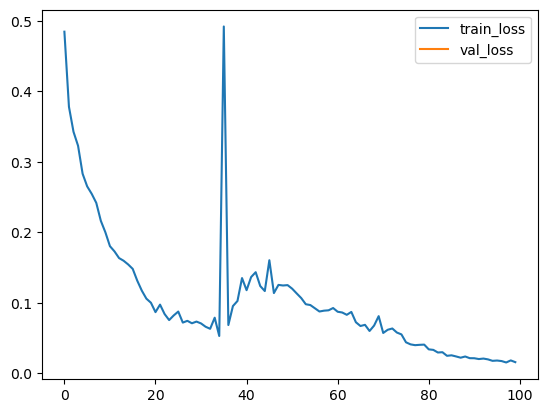

In [14]:
dhs.training_log_.plot()

In [15]:
y_dhs = dhs.predict(X)

In [16]:
y_dhs.shape, y_dhs.dtype


((198,), dtype('float64'))

In [17]:
assert( y_cox.shape == y_dhs.shape)

In [18]:
concordance_index_censored(event_indicator = tosa.get_indicator(y), 
                           event_time = tosa.get_time(y),
                           estimate = y_dhs)

(0.9570761267516728, 7581, 340, 0, 0)

In [19]:
type(y)


numpy.ndarray

In [20]:
dhs.harrell_score(y,y_dhs)


(0.9570761267516728, 7581, 340, 0, 0)

In [21]:
dhs.score(X,y)

0.9570761267516728

In [22]:
from sklearn.model_selection import cross_val_score

In [30]:
cv_score = cross_val_score(dhs, X, y, cv=3)

In [31]:
cv_score.mean(), cv_score.std() 

(0.5857537661321218, 0.07976650002190927)

In [32]:
cv_score

array([0.53268293, 0.52608213, 0.69849624])